In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("large_company_sales_data.csv")

In [19]:
data.head() 

,sales,advertising,price,season,competitor_data
0,302,143,137,Spring,21
1,635,60,131,Winter,28
2,470,176,91,Spring,32
3,306,34,118,Winter,24
4,271,64,81,Fall,11


In [20]:
data = pd.get_dummies(data, drop_first=True)

In [21]:
scaler = StandardScaler()
data[['advertising','price','competitor_data']] = scaler.fit_transform(data[['advertising','price','competitor_data']])
data.head()

,sales,advertising,price,competitor_data,season_Spring,season_Summer,season_Winter
0,302,0.640356,1.145359,-0.218768,True,False,False
1,635,-0.960052,0.858900,0.726526,False,False,True
2,470,1.276662,-1.050827,1.266693,True,False,False
3,306,-1.461384,0.238238,0.186358,False,False,True
4,271,-0.882924,-1.528259,-1.569187,False,False,False


In [22]:
X = data.drop('sales', axis = 1)
Y = data['sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
print(Y_pred)

[562.01825168 527.28959906 580.72444348 685.12546778 541.03746906
 678.84000704 549.34967239 673.05131343 573.42751231 595.61209037
 632.89774716 631.17804404 568.30572702 526.79563276 644.86328217
 681.92281358 653.65526628 605.63179868 587.22109993 573.6370634 ]


In [24]:
root_mean_squared_error = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error: ", root_mean_squared_error)
print(pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}))

Root Mean Squared Error:  256.8918234714878
           Feature  Coefficient
0      advertising    -1.613986
1            price    18.920726
2  competitor_data   -45.929155
3    season_Spring   -72.415333
4    season_Summer   -15.902624
5    season_Winter   -28.807338


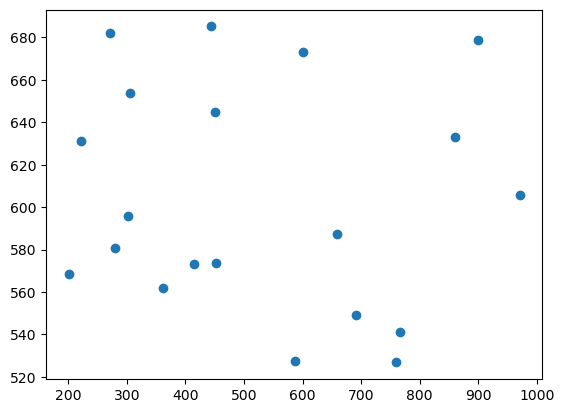

In [25]:
plt.scatter(Y_test,Y_pred)

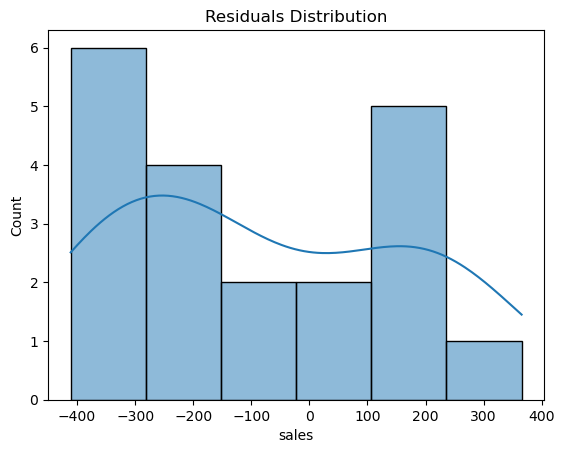

In [26]:
residuals = Y_test - Y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()